Імпортуємо пакет pandas

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

Завантажую файли movies.dat, ratings.dat, users.dat у змінні за допомогою пакету pandas

In [72]:
encoding = 'ISO-8859-1'

movies_df = pd.read_csv('movies.dat', sep='::', names=['MovieID', 'Title', 'Genres'], encoding=encoding, engine='python')
ratings_df = pd.read_csv('ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding=encoding, engine='python')
users_df = pd.read_csv('users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'ZIP_code'], encoding=encoding, engine='python')

Робимо Merge в єдиний DataFrame

In [73]:
merged_df = pd.merge(movies_df, ratings_df, on='MovieID')
merged_df = pd.merge(merged_df, users_df, on='UserID')

Визначимо функцію get_top яка повертає повний список фільмів відповідної статі та віку

In [74]:
def get_top(_lst, _gender, _age, _movies_df):
    top_movies = _lst[(_lst['Age'] == _age) & (_lst['Gender'] == _gender)]
    rating_count = top_movies.groupby(['MovieID'])['Rating'].count()
    rating_count.name = 'Rating Count'
    top_movies = pd.merge(top_movies, rating_count, on='MovieID')
    top_movies = top_movies[top_movies['Rating Count'] >= 30]
    top_movies = top_movies.groupby('MovieID')['Rating'].mean()
    top_movies = pd.merge(_movies_df, top_movies, on='MovieID').sort_values(by=['Rating'], ascending=[False])
    return top_movies

Визначемо функцію яка буде виводити фільми для відповідної статі та віку

In [75]:
def print_top_ten(_lst, _gender, _age, _movies_df):
    top_movies = get_top(_lst, _gender, _age, _movies_df).head(10)
    print(top_movies.to_string(index = False))

Виводимо результати аналізу для кожної вікової групи з розбивкою по статі

In [76]:
print_top_ten(merged_df, 'F', 1, movies_df) # Female Under 18

 MovieID                             Title                              Genres   Rating
    2396        Shakespeare in Love (1998)                      Comedy|Romance 4.272727
    2762           Sixth Sense, The (1999)                            Thriller 4.225806
    3114                Toy Story 2 (1999)         Animation|Children's|Comedy 4.222222
       1                  Toy Story (1995)         Animation|Children's|Comedy 4.076923
    2858            American Beauty (1999)                        Comedy|Drama 4.033333
     356               Forrest Gump (1994)                  Comedy|Romance|War 4.000000
    2355              Bug's Life, A (1998)         Animation|Children's|Comedy 4.000000
     588                    Aladdin (1992) Animation|Children's|Comedy|Musical 3.777778
    1097 E.T. the Extra-Terrestrial (1982)     Children's|Drama|Fantasy|Sci-Fi 3.696970
      39                   Clueless (1995)                      Comedy|Romance 3.466667


In [77]:
print_top_ten(merged_df, 'M', 1, movies_df) # Male Under 18

 MovieID                                                                       Title                 Genres   Rating
    2858                                                      American Beauty (1999)           Comedy|Drama 4.629032
     858                                                       Godfather, The (1972)     Action|Crime|Drama 4.589744
     318                                            Shawshank Redemption, The (1994)                  Drama 4.545455
    2918                                             Ferris Bueller's Day Off (1986)                 Comedy 4.500000
    2571                                                          Matrix, The (1999) Action|Sci-Fi|Thriller 4.487805
     296                                                         Pulp Fiction (1994)            Crime|Drama 4.475000
     750 Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)             Sci-Fi|War 4.451613
    2028                                                  Saving

In [78]:
print_top_ten(merged_df, 'F', 18, movies_df) # Female 18-24

 MovieID                                      Title                          Genres   Rating
    1148                 Wrong Trousers, The (1993)                Animation|Comedy 4.693878
      50                 Usual Suspects, The (1995)                  Crime|Thriller 4.618557
     745                      Close Shave, A (1995)       Animation|Comedy|Thriller 4.611111
     318           Shawshank Redemption, The (1994)                           Drama 4.603306
    2324 Life Is Beautiful (La Vita è bella) (1997)                    Comedy|Drama 4.592593
    2858                     American Beauty (1999)                    Comedy|Drama 4.467742
     916                       Roman Holiday (1953)                  Comedy|Romance 4.447368
     527                    Schindler's List (1993)                       Drama|War 4.431034
    1197                 Princess Bride, The (1987) Action|Adventure|Comedy|Romance 4.413043
     593           Silence of the Lambs, The (1991)                  D

In [79]:
print_top_ten(merged_df, 'M', 18, movies_df) # Male 18-24

 MovieID                                                               Title                            Genres   Rating
      50                                          Usual Suspects, The (1995)                    Crime|Thriller 4.700658
     318                                    Shawshank Redemption, The (1994)                             Drama 4.699708
    2019 Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)                      Action|Drama 4.635135
     858                                               Godfather, The (1972)                Action|Crime|Drama 4.570470
     745                                               Close Shave, A (1995)         Animation|Comedy|Thriller 4.550562
    2858                                              American Beauty (1999)                      Comedy|Drama 4.540643
    2571                                                  Matrix, The (1999)            Action|Sci-Fi|Thriller 4.534676
    2324                          Life I

In [80]:
print_top_ten(merged_df, 'F', 25, movies_df) # Female 25-34

 MovieID                                                  Title                    Genres   Rating
     745                                  Close Shave, A (1995) Animation|Comedy|Thriller 4.793651
     720 Wallace & Gromit: The Best of Aardman Animation (1996)                 Animation 4.757576
    1223                                Grand Day Out, A (1992)          Animation|Comedy 4.711111
    2186                            Strangers on a Train (1951)        Film-Noir|Thriller 4.657895
    1148                             Wrong Trousers, The (1993)          Animation|Comedy 4.650602
    3429                               Creature Comforts (1990)          Animation|Comedy 4.606061
     318                       Shawshank Redemption, The (1994)                     Drama 4.605150
    2762                                Sixth Sense, The (1999)                  Thriller 4.605042
     922          Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                 Film-Noir 4.583333
    1267  

In [81]:
print_top_ten(merged_df, 'M', 25, movies_df) # Male 25-34

 MovieID                                                               Title                          Genres   Rating
    1198                                      Raiders of the Lost Ark (1981)                Action|Adventure 4.625654
     858                                               Godfather, The (1972)              Action|Crime|Drama 4.619266
     260                           Star Wars: Episode IV - A New Hope (1977) Action|Adventure|Fantasy|Sci-Fi 4.614016
     318                                    Shawshank Redemption, The (1994)                           Drama 4.581395
    1178                                               Paths of Glory (1957)                       Drama|War 4.580645
      50                                          Usual Suspects, The (1995)                  Crime|Thriller 4.565217
    2019 Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)                    Action|Drama 4.559322
     904                                                

In [82]:
print_top_ten(merged_df, 'F', 35, movies_df) # Female 35-44

 MovieID                          Title                             Genres   Rating
     527        Schindler's List (1993)                          Drama|War 4.627273
     745          Close Shave, A (1995)          Animation|Comedy|Thriller 4.604651
     919       Wizard of Oz, The (1939) Adventure|Children's|Drama|Musical 4.584071
    1207   To Kill a Mockingbird (1962)                              Drama 4.583333
     898 Philadelphia Story, The (1940)                     Comedy|Romance 4.514286
      50     Usual Suspects, The (1995)                     Crime|Thriller 4.500000
    2762        Sixth Sense, The (1999)                           Thriller 4.489051
    1223        Grand Day Out, A (1992)                   Animation|Comedy 4.470588
    1035     Sound of Music, The (1965)                            Musical 4.464286
     904             Rear Window (1954)                   Mystery|Thriller 4.450704


In [83]:
print_top_ten(merged_df, 'M', 35, movies_df) # Male 35-44

 MovieID                                                                       Title               Genres   Rating
    1131                                                     Jean de Florette (1986)                Drama 4.619048
     858                                                       Godfather, The (1972)   Action|Crime|Drama 4.607843
     922                               Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)            Film-Noir 4.597826
    3307                                                          City Lights (1931) Comedy|Drama|Romance 4.586957
    1207                                                To Kill a Mockingbird (1962)                Drama 4.586957
    2019         Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)         Action|Drama 4.556452
     953                                                It's a Wonderful Life (1946)                Drama 4.548673
    1132                              Manon of the Spring (Manon des sources) (1

In [84]:
print_top_ten(merged_df, 'F', 45, movies_df) # Female 45-49

 MovieID                                     Title                          Genres   Rating
     527                   Schindler's List (1993)                       Drama|War 4.704225
    2762                   Sixth Sense, The (1999)                        Thriller 4.603774
     318          Shawshank Redemption, The (1994)                           Drama 4.548387
     910                   Some Like It Hot (1959)                    Comedy|Crime 4.516129
     920                 Gone with the Wind (1939)               Drama|Romance|War 4.510638
    1207              To Kill a Mockingbird (1962)                           Drama 4.470588
    1225                            Amadeus (1984)                           Drama 4.461538
     913                Maltese Falcon, The (1941)               Film-Noir|Mystery 4.459459
    1947                    West Side Story (1961)                 Musical|Romance 4.437500
     260 Star Wars: Episode IV - A New Hope (1977) Action|Adventure|Fantasy|Sci-

In [85]:
print_top_ten(merged_df, 'M', 45, movies_df) # Male 45-49

 MovieID                                                               Title                             Genres   Rating
    1148                                          Wrong Trousers, The (1993)                   Animation|Comedy 4.611111
     912                                                   Casablanca (1942)                  Drama|Romance|War 4.555556
     527                                             Schindler's List (1993)                          Drama|War 4.535211
    1204                                           Lawrence of Arabia (1962)                      Adventure|War 4.534247
    2019 Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)                       Action|Drama 4.528302
    1207                                        To Kill a Mockingbird (1962)                              Drama 4.507692
    1198                                      Raiders of the Lost Ark (1981)                   Action|Adventure 4.503356
    1252                        

In [86]:
print_top_ten(merged_df, 'F', 50, movies_df) # Female 50-55

 MovieID                        Title                             Genres   Rating
     527      Schindler's List (1993)                          Drama|War 4.765957
    1207 To Kill a Mockingbird (1962)                              Drama 4.757576
     908    North by Northwest (1959)                     Drama|Thriller 4.684211
     912            Casablanca (1942)                  Drama|Romance|War 4.617021
     910      Some Like It Hot (1959)                       Comedy|Crime 4.600000
    2762      Sixth Sense, The (1999)                           Thriller 4.577778
    1225               Amadeus (1984)                              Drama 4.552632
    1247         Graduate, The (1967)                      Drama|Romance 4.538462
     858        Godfather, The (1972)                 Action|Crime|Drama 4.529412
     919     Wizard of Oz, The (1939) Adventure|Children's|Drama|Musical 4.516129


In [87]:
print_top_ten(merged_df, 'M', 50, movies_df) # Male 50-55

 MovieID                                                               Title             Genres   Rating
    1148                                          Wrong Trousers, The (1993)   Animation|Comedy 4.694444
    2019 Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)       Action|Drama 4.673077
     913                                          Maltese Falcon, The (1941)  Film-Noir|Mystery 4.604651
    3897                                                Almost Famous (2000)       Comedy|Drama 4.578947
    3435                                             Double Indemnity (1944)    Crime|Film-Noir 4.560976
     922                       Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)          Film-Noir 4.555556
     912                                                   Casablanca (1942)  Drama|Romance|War 4.547826
     858                                               Godfather, The (1972) Action|Crime|Drama 4.544218
    1272                                               

In [88]:
print_top_ten(merged_df, 'F', 56, movies_df) # Female 56+

 MovieID                                  Title             Genres   Rating
     527                Schindler's List (1993)          Drama|War 4.714286
     318       Shawshank Redemption, The (1994)              Drama 4.633333
     356                    Forrest Gump (1994) Comedy|Romance|War 4.600000
    1193 One Flew Over the Cuckoo's Nest (1975)              Drama 4.435897
     920              Gone with the Wind (1939)  Drama|Romance|War 4.421053
     858                  Godfather, The (1972) Action|Crime|Drama 4.193548
    2028             Saving Private Ryan (1998)   Action|Drama|War 4.093750
    2858                 American Beauty (1999)       Comedy|Drama 4.018519
    2396             Shakespeare in Love (1998)     Comedy|Romance 3.953488


In [89]:
print_top_ten(merged_df, 'M', 56, movies_df) # Male 56+

 MovieID                                                               Title                             Genres   Rating
     912                                                   Casablanca (1942)                  Drama|Romance|War 4.602564
    2019 Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)                       Action|Drama 4.600000
     527                                             Schindler's List (1993)                          Drama|War 4.578947
    2028                                          Saving Private Ryan (1998)                   Action|Drama|War 4.561798
    3095                                         Grapes of Wrath, The (1940)                              Drama 4.560976
     858                                               Godfather, The (1972)                 Action|Crime|Drama 4.560440
    1254                            Treasure of the Sierra Madre, The (1948)                          Adventure 4.555556
     919                        

show_top_ten

In [104]:
def show_top_ten(_lst, _gender, _age, _movies_df):
    top_movies = get_top(_lst, _gender, _age, _movies_df).head(10)
    sns.set(style = "whitegrid")
    pyplot.figure(figsize=(10, 4))

    plot = sns.barplot(x = 'Title', y = 'Rating', data = top_movies, palette = 'viridis')
    plot.set(xlabel='Title', ylabel='Rating')
    plot.set_ylim(0, 5)
    pyplot.xticks(rotation = 90)

    pyplot.show()

C:\Users\Shevchenko\.conda\envs\Labs\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shevchenko\.conda\envs\Labs\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shevchenko\.conda\envs\Labs\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


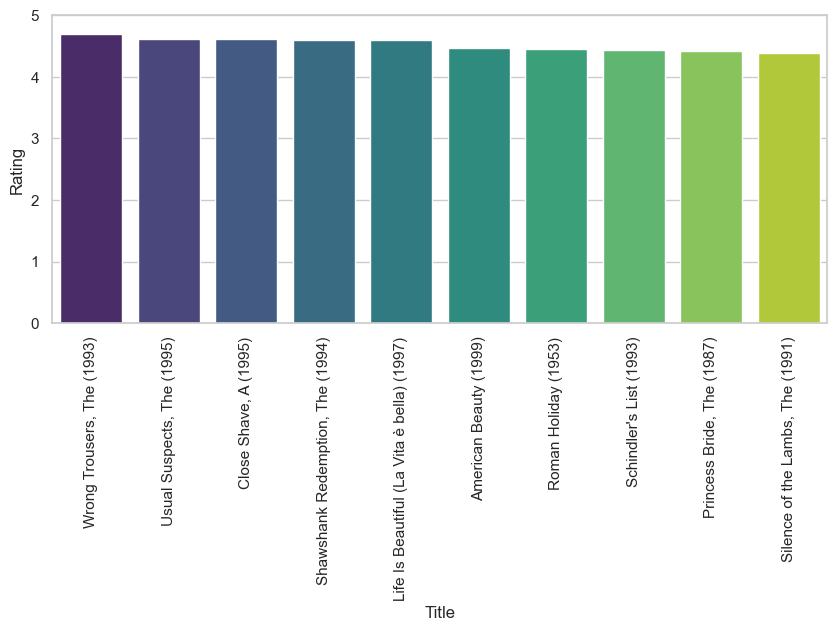

In [105]:
show_top_ten(merged_df, 'F', 18, movies_df) # Male Under 18